<a name="hw"></a>
# Homework 1

Come up with your own list of documents that you want to use to generate a dictionary. You can opt for using a lot of generic text that you pack into different documents and one main type of text that you want to target or 4 equally interesting types of dictionaries that you want to create. Please:

* get your own paragraphs - explain why you chose this
* preprocess the text (experiment with this step)
* create tfidf matrix (experiment with this step)
* print out dictionary lists with at least 20 terms

In [5]:
from src.utils import Utils


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


import nltk
import io
import sys
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

utils = Utils()

In [15]:

# Define our documents
documents = [
    "Machine learning is a subset of artificial intelligence that focuses on creating systems that can learn from and make decisions based on data. It utilizes statistical techniques to enable computers to improve their performance on a specific task progressively. Machine learning algorithms build a model based on sample data, known as training data, to make predictions or decisions without being explicitly programmed to do so. Some popular machine learning techniques include supervised learning, unsupervised learning, and reinforcement learning.",
    "Natural language processing is a field of AI that deals with the interaction between computers and humans using natural language. It combines computational linguistics, machine learning, and deep learning models to process and analyze large amounts of natural language data. NLP tasks include speech recognition, natural language understanding, and natural language generation. Applications of NLP are widespread, including machine translation, sentiment analysis, chatbots, and voice assistants.",
    "Deep learning is part of a broader family of machine learning methods based on artificial neural networks. It uses multiple layers to progressively extract higher-level features from raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify concepts relevant to a human such as digits or letters or faces. Deep learning has produced results comparable to and in some cases superior to human experts in various fields, including computer vision, speech recognition, natural language processing, and playing complex games.",
    "The stock market is a complex system where shares of publicly-traded companies are issued, bought and sold. It serves as a platform for companies to raise capital and for investors to own parts of businesses, potentially profit from their growth. The stock market is influenced by various factors including economic indicators, company performance, geopolitical events, and investor sentiment. Stock prices can be volatile, reflecting the constant flow of information and changing market dynamics. Major stock exchanges include the New York Stock Exchange (NYSE) and NASDAQ in the United States.",
    "Animals are a diverse group of multicellular eukaryotic organisms that form the biological kingdom Animalia. They are capable of locomotion, reproduce sexually, and feed on organic matter. Animals have evolved a wide range of adaptations to survive in various environments, from the depths of the oceans to the driest deserts. They play crucial roles in ecosystems as predators, prey, pollinators, and decomposers. The study of animals, known as zoology, encompasses various sub-disciplines including ethology (animal behavior), ecology, and evolutionary biology.",
    "Art is a diverse range of human activities involving creative imagination to express technical proficiency, beauty, emotional power, or conceptual ideas. It encompasses various forms including painting, sculpture, literature, music, dance, and photography. Throughout history, art has been a powerful medium for cultural expression, social commentary, and personal exploration. It often reflects the social, political, and technological contexts of its time. The interpretation and appreciation of art can be highly subjective, leading to ongoing debates about its nature, purpose, and value in society.",
]

# Redirect stdout to capture NLTK download messages
old_stdout = sys.stdout
sys.stdout = io.StringIO()

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Restore stdout
sys.stdout = old_stdout

# Explanation of choice
print("I chose these documents to create a diverse set of texts covering various topics including AI/ML, finance, biology, and art.\n\
      This selection allows us to observe how different domains affect the resulting dictionary and highlights the versatility of our text analysis approach.\n\
      By including both technical and non-technical subjects, we can explore how specialized terminology and general language usage differ across fields.")


I chose these documents to create a diverse set of texts covering various topics including AI/ML, finance, biology, and art.
      This selection allows us to observe how different domains affect the resulting dictionary and highlights the versatility of our text analysis approach.
      By including both technical and non-technical subjects, we can explore how specialized terminology and general language usage differ across fields.


In [16]:
# Preprocess the documents
preprocessed_docs = [utils.preprocess_text(doc, 2) for doc in documents]
preprocessed_docs

['machine learning subset artificial intelligence focus create system learn make decision base datum utilize statistical technique enable computer improve performance specific task progressively machine learn algorithm build model base sample datum know training datum make prediction decision without explicitly program popular machine learn technique include supervise learning unsupervised learning reinforcement learning',
 'natural language processing field ai deal interaction computer human use natural language combine computational linguistic machine learning deep learning model process analyze large amount natural language datum nlp task include speech recognition natural language understanding natural language generation application nlp widespread include machine translation sentiment analysis chatbot voice assistant',
 'deep learning part broad family machine learning method base artificial neural network use multiple layer progressively extract high level feature raw input examp

In [17]:

print("TF-IDF Matrix 1: This matrix captures the TF-IDF scores for the top 100 terms\n\
      (unigrams and bigrams) from the preprocessed documents,\n\
      excluding common stop words.")

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=10, 
                             ngram_range=(1, 2), 
                             stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)

# Print shapes of different matrices
print(f"***** Original TF-IDF matrix shape: {tfidf_matrix.shape}\n\n")

print(f"TF-IDF Matrix 2: This matrix calculates the TF-IDF scores only for the\n\
      terms specified in custom_vocab\n\
      (e.g., 'machine', 'learning', 'artificial', etc.).\n\
      It ignores all other terms in the documents.")

# Create a custom vocabulary
custom_vocab = ['machine', 
                'learning', 
                'artificial', 
                'intelligence', 
                'neural', 
                'network']

vectorizer_custom = TfidfVectorizer(vocabulary=custom_vocab)
tfidf_matrix_custom = vectorizer_custom.fit_transform(preprocessed_docs)

print(f"***** Custom vocabulary TF-IDF matrix shape: {tfidf_matrix_custom.shape}\n\n")


#####
print(f"TF-IDF Matrix 3: This matrix is designed to experiment with different\n\
      TF-IDF parameters to potentially improve the quality of the feature\n\
      representation by filtering out very common and very rare terms and\n\
      applying sublinear scaling.")

vectorizer_exp = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)
tfidf_matrix_exp = vectorizer_exp.fit_transform(preprocessed_docs)



print(f"***** Experimental TF-IDF matrix shape: {tfidf_matrix_exp.shape}")


TF-IDF Matrix 1: This matrix captures the TF-IDF scores for the top 100 terms
      (unigrams and bigrams) from the preprocessed documents,
      excluding common stop words.
***** Original TF-IDF matrix shape: (6, 10)


TF-IDF Matrix 2: This matrix calculates the TF-IDF scores only for the
      terms specified in custom_vocab
      (e.g., 'machine', 'learning', 'artificial', etc.).
      It ignores all other terms in the documents.
***** Custom vocabulary TF-IDF matrix shape: (6, 6)


TF-IDF Matrix 3: This matrix is designed to experiment with different
      TF-IDF parameters to potentially improve the quality of the feature
      representation by filtering out very common and very rare terms and
      applying sublinear scaling.
***** Experimental TF-IDF matrix shape: (6, 31)


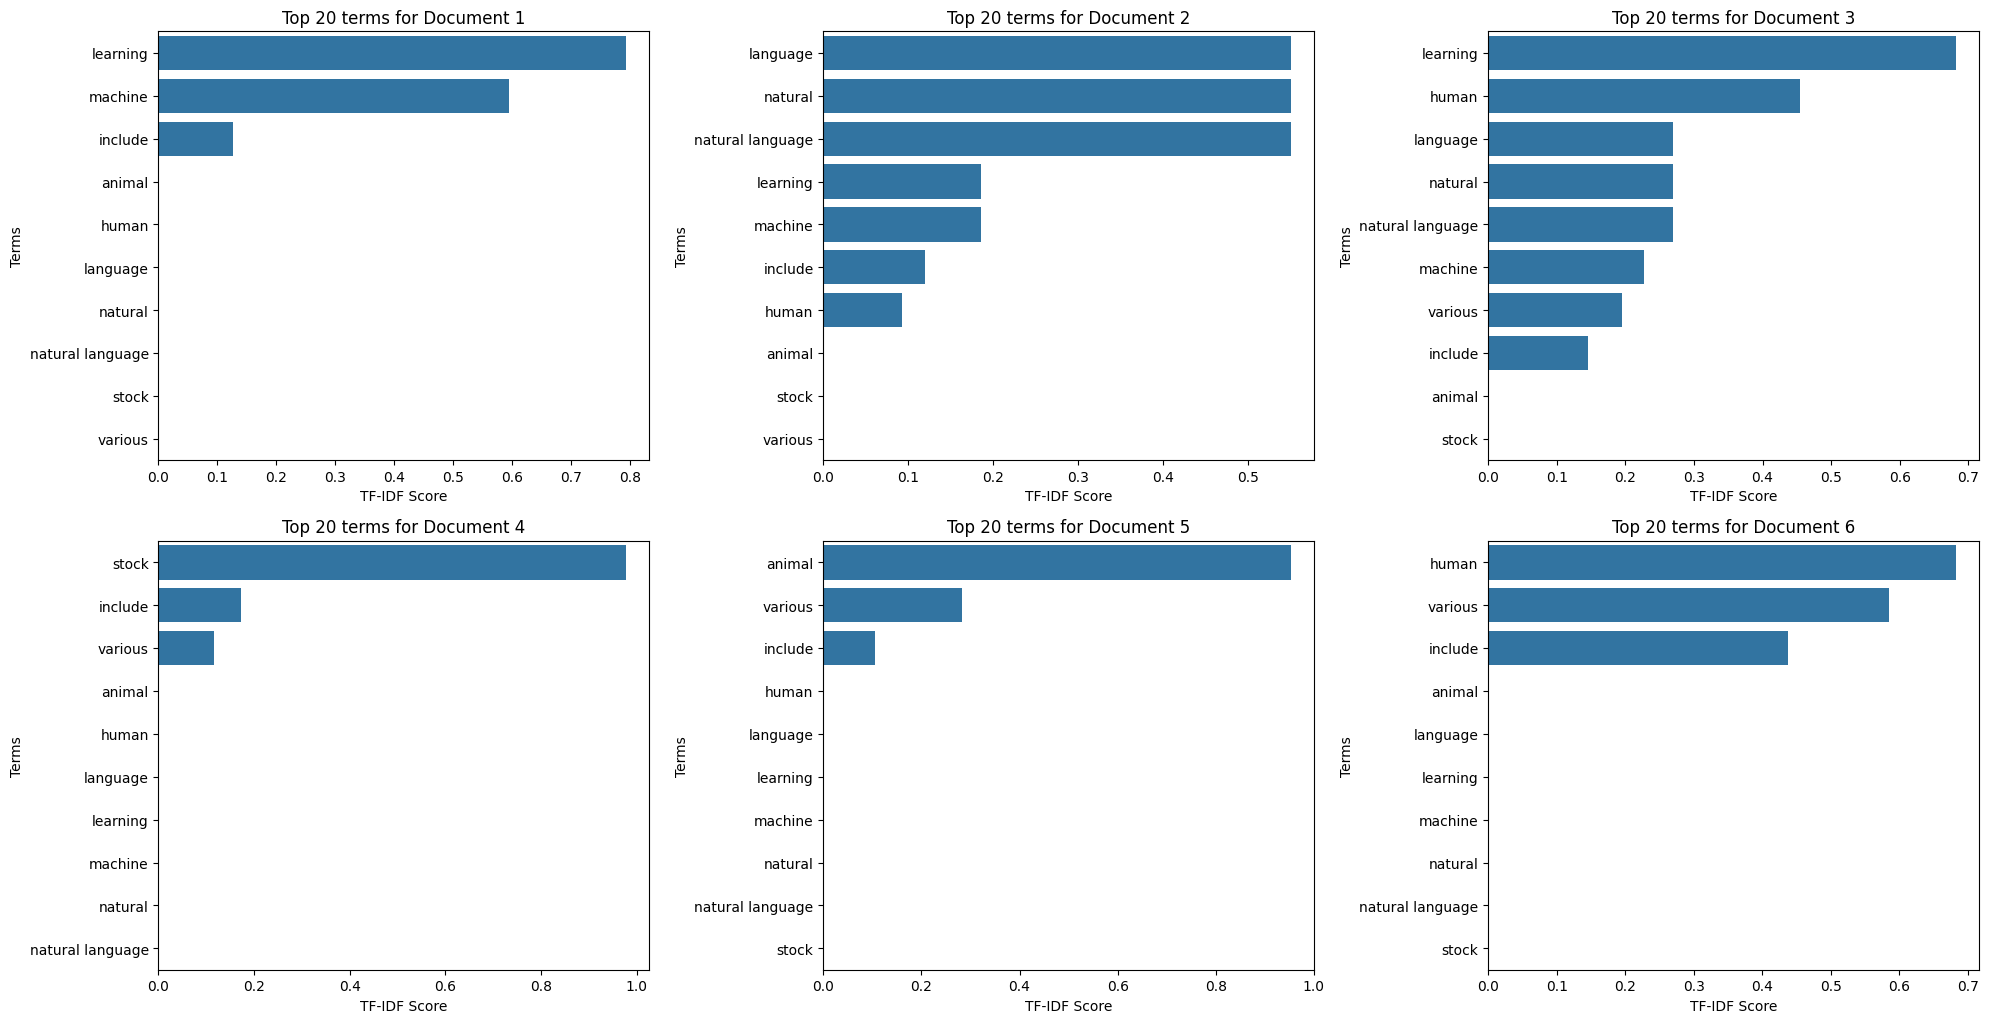

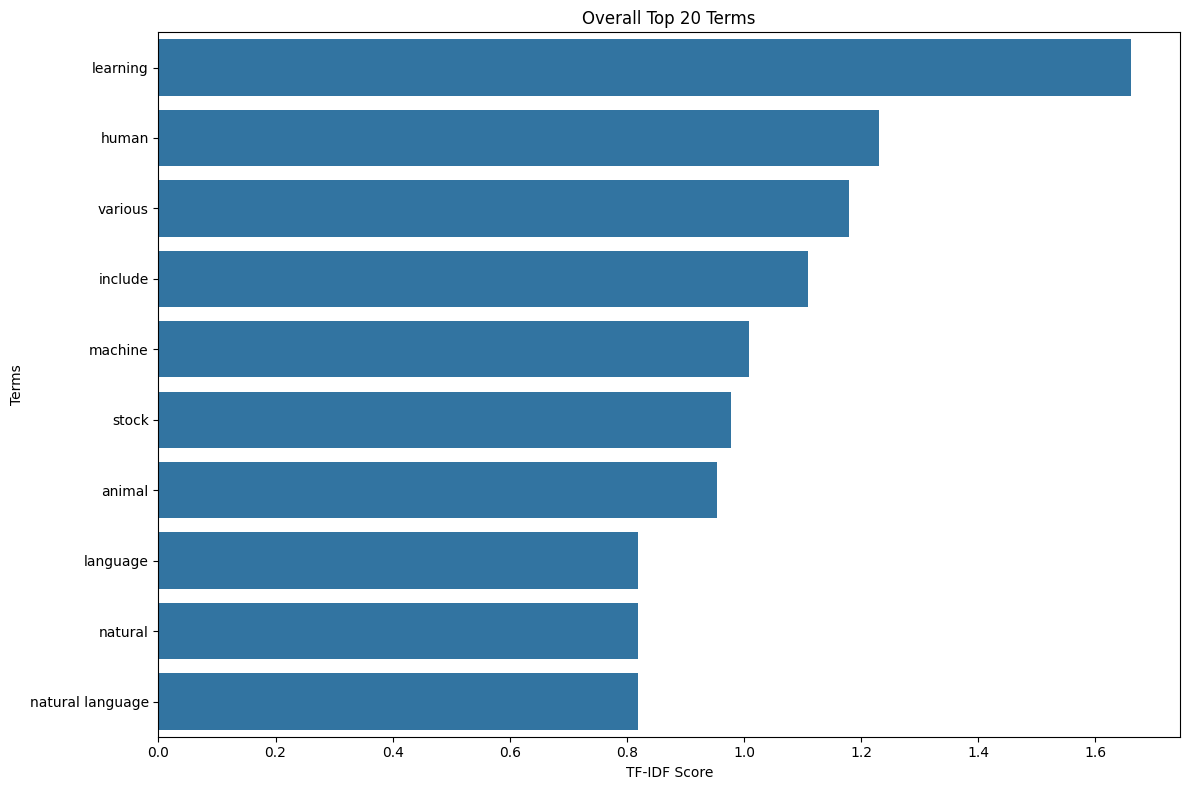

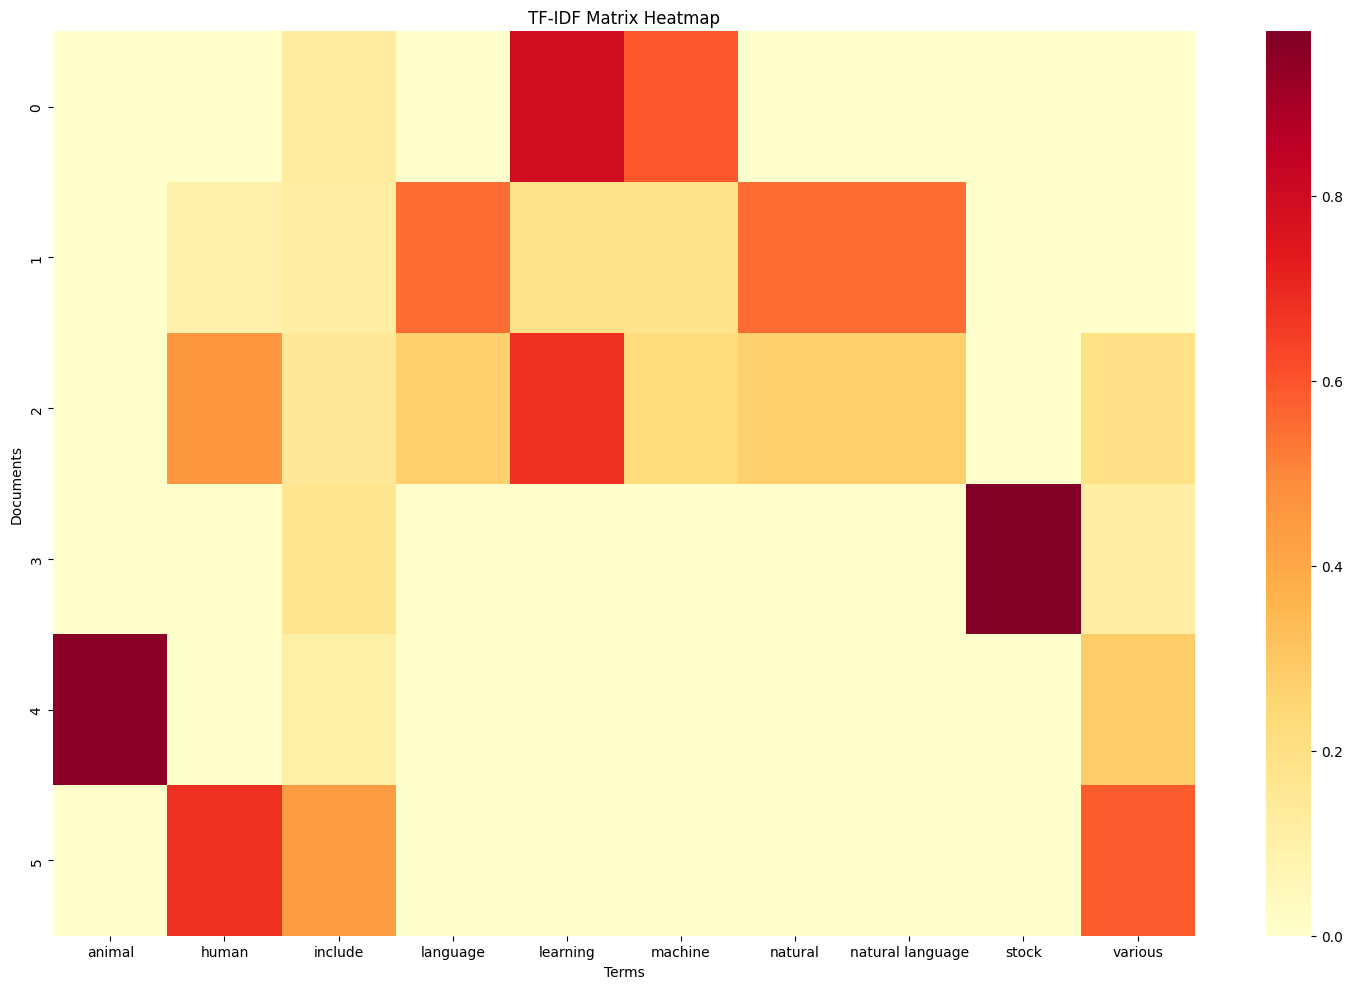

In [18]:

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for easier viewing
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)



# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot top 20 terms for each document
for i, doc in enumerate(documents):
    plt.subplot(3, 3, i+1)
    top_terms = df.iloc[i].sort_values(ascending=False).head(20)
    sns.barplot(x=top_terms.values, y=top_terms.index, orient='h')
    plt.title(f"Top 20 terms for Document {i+1}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Terms")

plt.tight_layout()
plt.show()

# Plot overall top 20 terms
plt.figure(figsize=(12, 8))
overall_scores = df.sum().sort_values(ascending=False).head(20)
sns.barplot(x=overall_scores.values, y=overall_scores.index, orient='h')
plt.title("Overall Top 20 Terms")
plt.xlabel("TF-IDF Score")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

# Create a heatmap of the TF-IDF matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df, cmap='YlOrRd')
plt.title("TF-IDF Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()